In [1]:
using DataFrames, PyPlot, LowRankModels, StatsBase
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

## Scale data and split data into train, validation, test sets

In [11]:
data = readtable("One-Hot-Reformated.csv")

,x1,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Jan,Feb,Mar,Apil,May,June,July,Aug,Sep,Oct,Nov,Dec,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14
1,699,82.06666667,63.73333333,72.9,3.75,0.0,8.133333333,0.116,0.0,0.0,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.87350848,1.315565062,0.368711287,0.746816211,-1.026314632,1.263279859,-0.504307245,-0.783186819,-0.294407069,1.314841215,1.916589898,-0.332154959,-0.448861413,-0.728525624
2,1061,82.06666667,63.73333333,72.9,3.75,0.0,8.133333333,0.116,0.0,0.0,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.995156823,-0.443981408,-2.263467258,0.340877844,1.018166845,1.357898256,0.353070417,-1.589093283,0.182964968,-1.115941922,0.31180485,1.297522784,0.277647542,0.878704471
3,48,83.64516129,65.58064516,74.61290323,-1.974193548,0.0,10.0,0.078709677,0.0,0.0,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.146229603,-0.690490396,-2.402680341,-0.544209434,2.135348317,-0.329957167,-1.8805805,0.643275624,-0.324663524,0.383670142,0.480850868,-0.297690544,-1.759940493,1.20092218
4,12,86.03333333,66.7,76.36666667,3.116666667,0.0,11.56666667,0.095666667,0.0,0.0,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.256453215,1.056020817,2.527432425,-0.552122468,-0.788348846,0.39014954,1.547638728,-0.396719724,0.781237462,0.495759507,-1.928345078,-0.802734974,0.221412317,-0.022654783
5,59,70.93548387,51.41935484,61.17741935,-2.722580645,4.806451613,1.193548387,0.146774194,0.0,0.0,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1.714834451,-0.132661191,0.638074943,-1.035145092,-0.699901056,1.846982622,0.893780168,-1.748560375,0.057775044,-0.814969643,-0.51470915,0.041578255,-0.295709758,-0.697309667
6,92,52.25806452,35.03225806,43.64516129,0.090322581,21.06451613,0.0,0.052258065,0.290322581,0.483870968,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.146229603,-0.690490396,-2.402680341,-0.544209434,2.135348317,-0.329957167,-1.8805805,0.643275624,-0.324663524,0.383670142,0.480850868,-0.297690544,-1.759940493,1.20092218
7,1644,74.09677419,55.93548387,65.01612903,1.116129032,2.548387097,2.774193548,0.156129032,0.0,0.0,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.025946579,1.047752679,-0.300773462,-0.058555243,-1.167272392,-1.393338273,-0.366767062,-1.615666385,0.028286701,-0.188522383,0.832406651,-0.447973691,-0.343268634,-0.717608381
8,4,67.70967742,50.32258065,59.01612903,1.519354839,6.419354839,0.612903226,0.161612903,0.0,0.0,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.256453215,1.056020817,2.527432425,-0.552122468,-0.788348846,0.39014954,1.547638728,-0.396719724,0.781237462,0.495759507,-1.928345078,-0.802734974,0.221412317,-0.022654783
9,495,46.0,28.10714286,37.05357143,1.296428571,27.64285714,0.0,0.03,0.3,0.821428571,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.373825301,0.230607962,0.467059954,-0.106346881,-0.611488353,0.968236098,1

In [12]:
for i = 2:17
    x = data[:,i].data
    means = mean(x)
    sds = std(x)
    data[:,i] = (x .- mean(x))/std(x)
end

In [13]:
data

,x1,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Jan,Feb,Mar,Apil,May,June,July,Aug,Sep,Oct,Nov,Dec,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14
1,699,1.001042885484846,0.9863454644958778,0.9957471419995301,0.9774706725699728,-1.0066103262694723,0.7714695857944349,-0.19125473025679912,-0.32347725952079515,-0.2594542297005921,1.1082240448638663,-0.2537391873325383,-1.168557685555012,-1.6713212263784025,0.9387876106473869,-0.8648910695460733,-0.3425126657756035,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.87350848,1.315565062,0.368711287,0.746816211,-1.026314632,1.263279859,-0.504307245,-0.783186819,-0.294407069,1.314841215,1.916589898,-0.332154959,-0.448861413,-0.728525624
2,1061,1.001042885484846,0.9863454644958778,0.9957471419995301,0.9774706725699728,-1.0066103262694723,0.7714695857944349,-0.19125473025679912,-0.32347725952079515,-0.2594542297005921,1.1082240448638663,-0.2537391873325383,-1.168557685555012,-1.6713212263784025,0.9387876106473869,-0.8648910695460733,-0.3425126657756035,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.995156823,-0.443981408,-2.263467258,0.340877844,1.018166845,1.357898256,0.353070417,-1.589093283,0.182964968,-1.115941922,0.31180485,1.297522784,0.277647542,0.878704471
3,48,1.0953927954267484,1.1047145421967146,1.101880844326989,-1.0534631500052825,-1.0066103262694723,1.1207955801254978,-0.610710112090316,-0.32347725952079515,-0.2594542297005921,-0.6542807411949126,0.17301781531483484,0.5570899595248774,-0.6097279633347306,-1.4879109171138027,-0.36305619319924115,1.9186993919503026,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.146229603,-0.690490396,-2.402680341,-0.544209434,2.135348317,-0.329957167,-1.8805805,0.643275624,-0.324663524,0.383670142,0.480850868,-0.297690544,-1.759940493,1.20092218
4,12,1.2381388105508098,1.1764387621573302,1.2105462981797093,0.7527651177755462,-1.0066103262694723,1.4139798973676536,-0.4199716002464491,-0.32347725952079515,-0.2594542297005921,-0.6542807411949126,0.17301781531483484,0.5570899595248774,-0.6097279633347306,-1.4879109171138027,-0.36305619319924115,1.9186993919503026,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.256453215,1.056020817,2.527432425,-0.552122468,-0.788348846,0.39014954,1.547638728,-0.396719724,0.781237462,0.495759507,-1.928345078,-0.802734974,0.221412317,-0.022654783
5,59,0.3357089138512564,0.19731014678817896,0.26940086427271887,-1.3189895783014152,-0.6008575832449983,-0.5272343122085779,0.15490481614586202,-0.32347725952079515,-0.2594542297005921,-0.6542807411949126,0.17301781531483484,0.5570899595248774,-0.6097279633347306,-1.4879109171138027,-0.36305619319924115,1.9186993919503026,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1.714834451,-0.132661191,0.638074943,-1.035145092,-0.699901056,1.846982622,0.893780168,-1.748560375,0.057775044,-0.814969643,-0.51470915,0.041578255,-0.295709758,-0.697309667
6,92,-0.7806793280165847,-0.8527158967536679,-0.8169205492657652,-0.32097645148978377,0.7716214938769671,-0.7505936748853055,-0.9082476531722756,0.7951431738920898,0.2322536221487231,0.655008528448752,-0.4288189832904341,-0.02020465793086206,0.30199330963218574,1.455106446341257,-1.1158085077194901,0.17139916552573894,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.146229603,-0.690490396,-2

In [7]:
n,d = size(data)

(1799,68)

In [29]:
sample = StatsBase.sample(1:n, 1079,replace = false);
fitdata = data[sample,:]
rest = setdiff(1:n,sample)
validation = StatsBase.sample(rest,360,replace = false)
validationdata = data[validation,:]
testdata = data[setdiff(rest,validation),:];

## Train Data

In [30]:
XGLRM= hcat(convert(Array{Float64,2},fitdata[:,2:29]),convert(Array{Float64,2},fitdata[:,55:68]))
XOneHot = convert(Array{Float64,2},fitdata[:,2:54])
y = fitdata[:,1].data;

In [31]:
wGLRM = proxgrad_linesearch(QuadLoss(), QuadReg(1) ,XGLRM, y; stepsize=0.1, maxiters = 500000)
wOneHot = proxgrad_linesearch(QuadLoss(), QuadReg(1) ,XOneHot, y; stepsize=0.1, maxiters = 500000)

53-element Array{Float64,1}:
   49.728   
  -33.9759  
    9.34749 
    0.846325
  -37.3225  
  -22.0257  
   -3.76844 
  -10.8202  
   -1.39689 
  -10.777   
   13.7637  
   16.0844  
    5.50846 
    ⋮       
 -331.72    
 -362.298   
 -381.544   
 -384.914   
 -398.809   
 -414.919   
 -416.138   
 -427.285   
 -420.13    
 -448.557   
 -447.974   
 -451.305   

In [32]:
yfitGLRM = XGLRM*wGLRM
yfitOneHot = XOneHot*wOneHot;

In [33]:
@show trainerrGRLM = mean((y-yfitGLRM).^2)
@show trainerrOneHot = mean((y-yfitOneHot).^2)

trainerrGRLM = mean((y - yfitGLRM) .^ 2) = 378383.80867567676
trainerrOneHot = mean((y - yfitOneHot) .^ 2) = 34000.85849577168


34000.85849577168

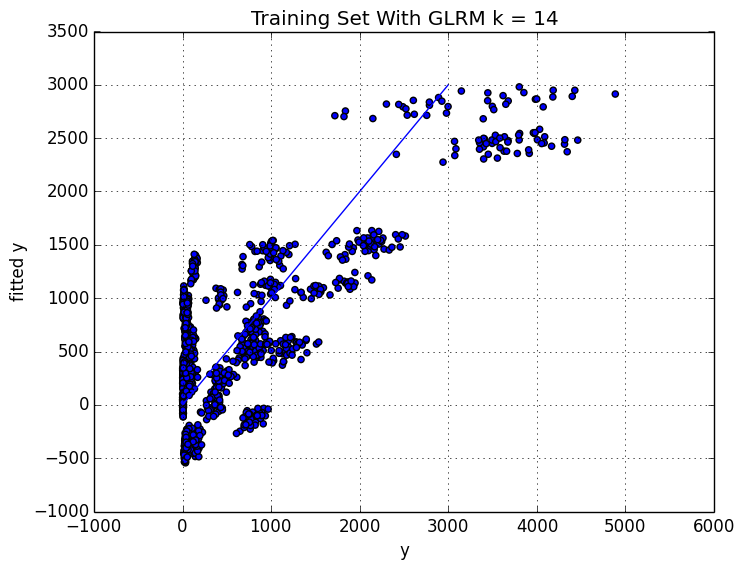

PyObject <matplotlib.text.Text object at 0x3289c1410>

  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/rainyniu/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /User

In [42]:
PyPlot.scatter(y,yfitGLRM)
PyPlot.plot(1:3000,1:3000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.grid("on")
PyPlot.title("Training Set With GLRM k = 14")

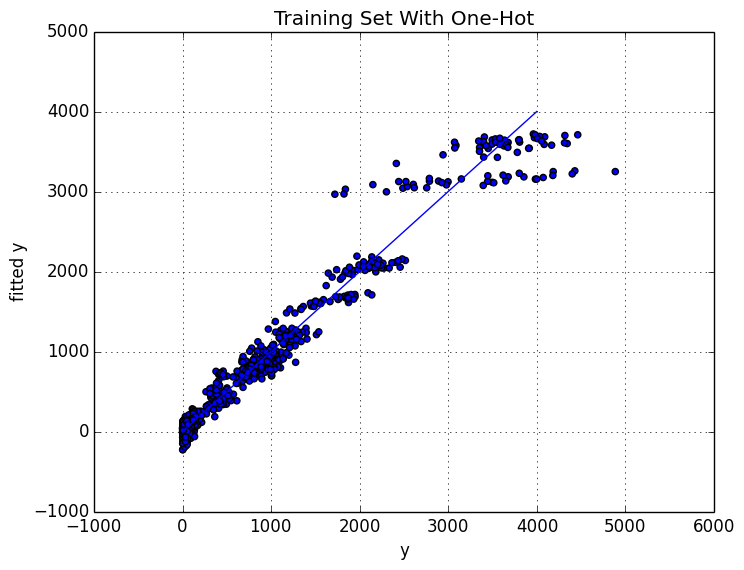

PyObject <matplotlib.text.Text object at 0x328cbe450>

In [44]:
PyPlot.scatter(y,yfitOneHot)
PyPlot.plot(1:4000,1:4000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.grid("on")
PyPlot.title("Training Set With One-Hot")

In [38]:
sqrt(trainerrGRLM)

615.1290991943697

In [39]:
sqrt(trainerrOneHot)

184.39321705467282

## Validate Model

In [34]:
XGLRMval= hcat(convert(Array{Float64,2},validationdata[:,2:29]),convert(Array{Float64,2},validationdata[:,55:68]))
XOneHotval = convert(Array{Float64,2},validationdata[:,2:54])
yval = validationdata[:,1].data;

In [35]:
yvalGLRM = XGLRMval*wGLRM
yvalOneHot = XOneHotval*wOneHot
@show valerrGRLM = mean((yval-yvalGLRM).^2)
@show valerrOneHot = mean((yval-yvalOneHot).^2);

valerrGRLM = mean((yval - yvalGLRM) .^ 2) = 462365.70115516434
valerrOneHot = mean((yval - yvalOneHot) .^ 2) = 77455.92846164675


In [40]:
[sqrt(valerrGRLM) sqrt(valerrOneHot)] 

1×2 Array{Float64,2}:
 679.975  278.309

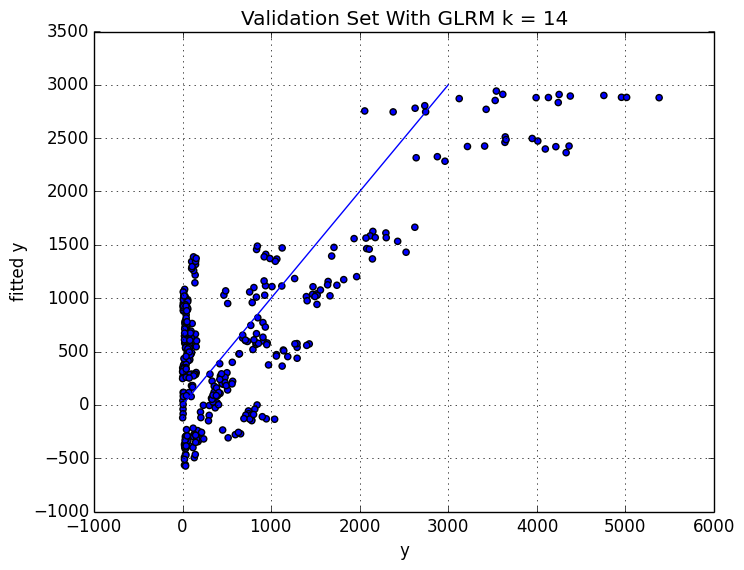

PyObject <matplotlib.text.Text object at 0x328d7d990>

In [45]:
PyPlot.scatter(yval,yvalGLRM)
PyPlot.plot(1:3000,1:3000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.grid("on")
PyPlot.title("Validation Set With GLRM k = 14")

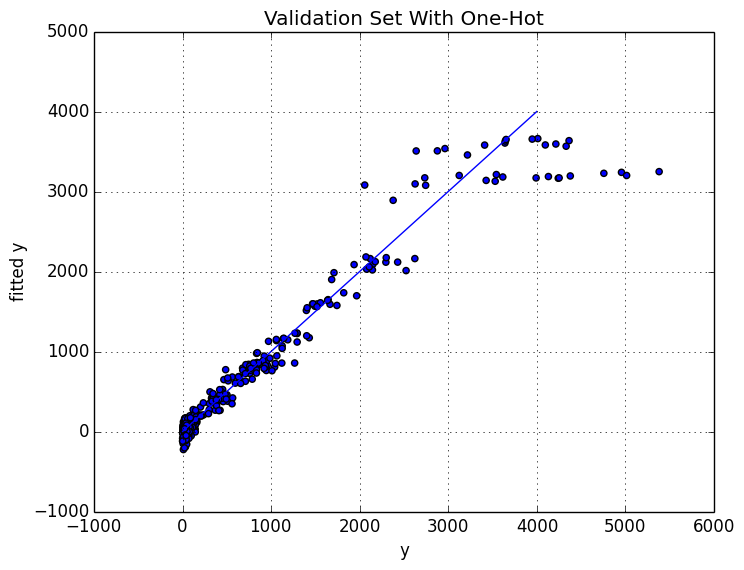

PyObject <matplotlib.text.Text object at 0x328ed39d0>

In [46]:
PyPlot.scatter(yval,yvalOneHot)
PyPlot.plot(1:4000,1:4000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.grid("on")
PyPlot.title("Validation Set With One-Hot")

## Test Model

In [36]:
XOneHottest = convert(Array{Float64,2},testdata[:,2:54])
ytest = testdata[:,1].data;

In [37]:
ytestOneHot = XOneHottest*wOneHot
@show testerrOneHot = mean((ytest-ytestOneHot).^2);

testerrOneHot = mean((ytest - ytestOneHot) .^ 2) = 34589.03468530183


In [41]:
sqrt(testerrOneHot)

185.98127509322498

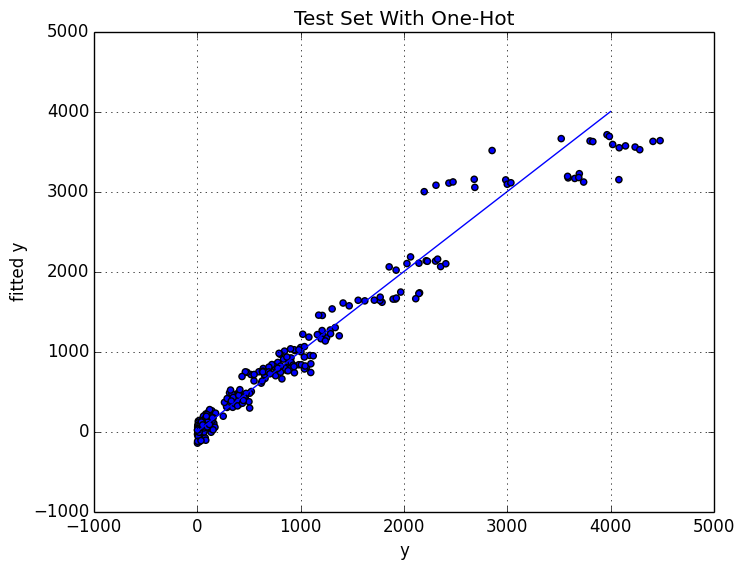

PyObject <matplotlib.text.Text object at 0x329173f10>

In [47]:
PyPlot.scatter(ytest,ytestOneHot)
PyPlot.plot(1:4000,1:4000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.grid("on")
PyPlot.title("Test Set With One-Hot")